#### Sprintの目的
- 発展的なRNNの手法を理解する
- ドキュメントを網羅的に読む


## KerasのRecurrentレイヤー

Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。


以下のドキュメントにまとめられています。


[Recurrentレイヤー - Keras Documentation](https://keras.io/ja/layers/recurrent/)

### 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


SimpleRNN
GRU
LSTM
ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。


Keras公式のサンプルコードを利用してください。


LSTMのサンプルコード


[keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py)


ConvLSTM2Dのサンプルコード


[keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py)


このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

#### LSTM

In [4]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 16 #32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [8]:
from keras import backend as K
K.clear_session()

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))# epochs=15
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 132s 5ms/step - loss: 0.4600 - accuracy: 0.7795 - val_loss: 0.3828 - val_accuracy: 0.8333
Epoch 2/5
25000/25000 [==============================] - 148s 6ms/step - loss: 0.2990 - accuracy: 0.8786 - val_loss: 0.3827 - val_accuracy: 0.8396
Epoch 

#### ConvLSTM2D

In [9]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

seq.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 40, 40, 40)  59200     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_3 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_4 (ConvLSTM2D)  (None, None, 40, 40, 40) 

In [11]:
# Artificial data generation:[ ＃人工データの生成：] 
# Generate movies with 3 to 7 moving squares inside.[ ＃3〜7個の移動する正方形が内部にあるムービーを生成します。] 
# The squares are of shape 1x1 or 2x2 pixels,[ ＃正方形は1x1または2x2ピクセルの形状で、] 
# which move linearly over time. [ ＃時間とともに直線的に移動します。] 
# For convenience we first create movies with bigger width and height (80x80)[ ＃便宜上、最初に幅と高さを大きくしたムービーを作成します（80x80）] 
# and at the end we select a 40x40 window.[ ＃そして最後に40x40ウィンドウを選択します。] 

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:300], shifted_movies[:300], batch_size=10,
        epochs=5, validation_split=0.05) #noisy_movies[:1000], shifted_movies[:1000],epochs=500

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

Train on 285 samples, validate on 15 samples
Epoch 1/5
285/285 [==============================] - 324s 1s/step - loss: 0.3914 - val_loss: 0.6008
Epoch 2/5
285/285 [==============================] - 310s 1s/step - loss: 0.1454 - val_loss: 0.5125
Epoch 3/5
285/285 [==============================] - 282s 988ms/step - loss: 0.0536 - val_loss: 0.4654
Epoch 4/5
285/285 [==============================] - 266s 935ms/step - loss: 0.0322 - val_loss: 0.4151
Epoch 5/5
285/285 [==============================] - 265s 930ms/step - loss: 0.0243 - val_loss: 0.3611


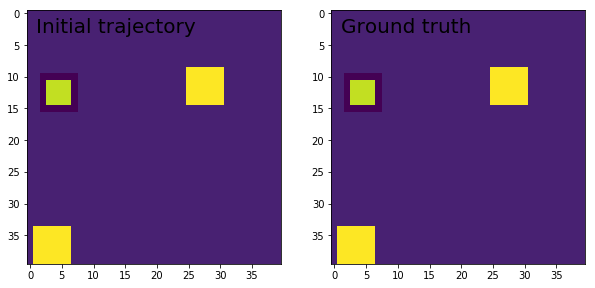

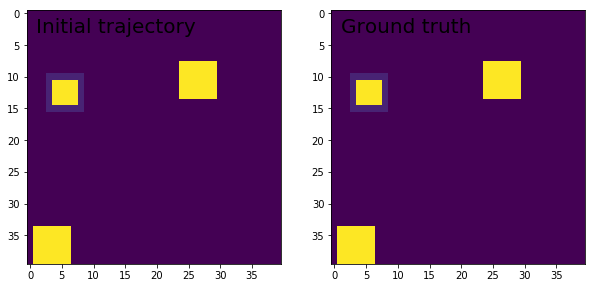

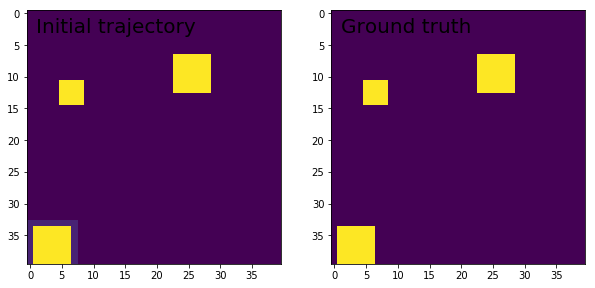

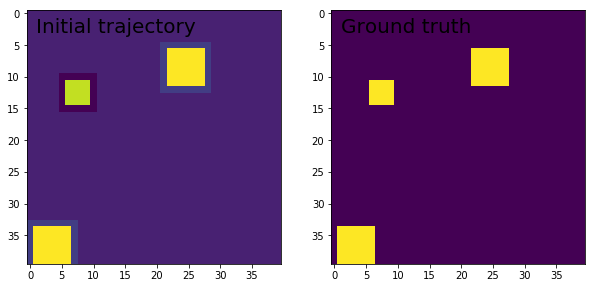

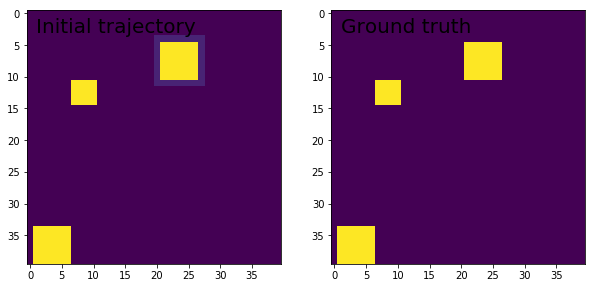

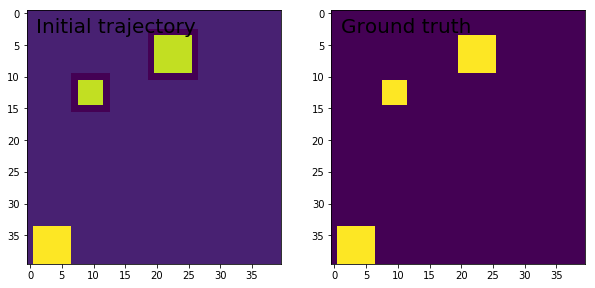

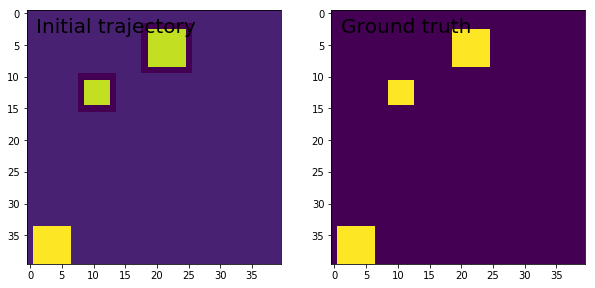

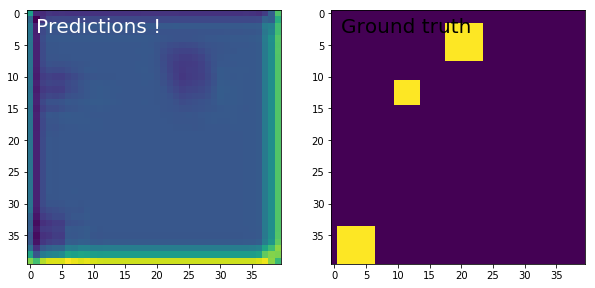

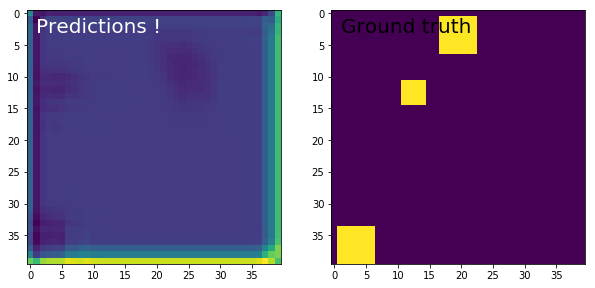

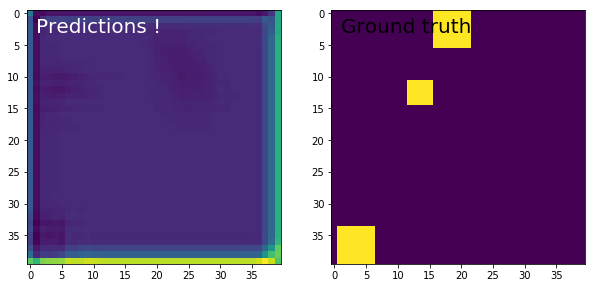

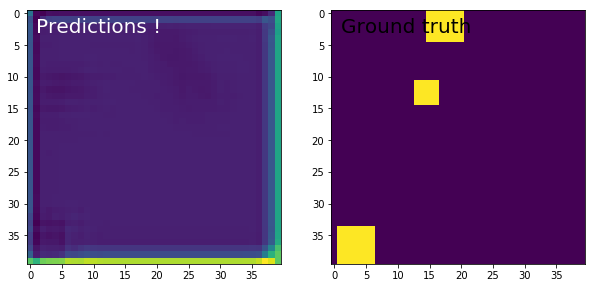

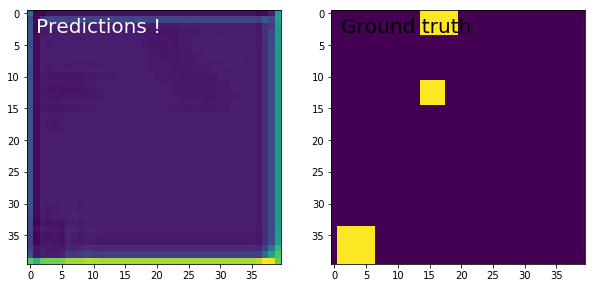

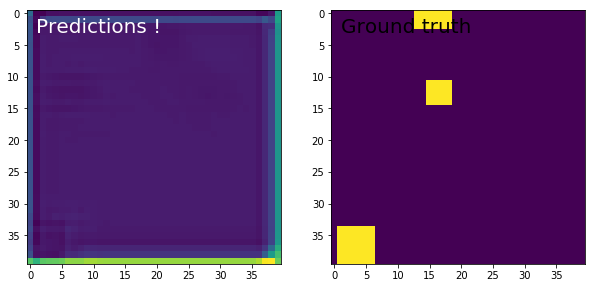

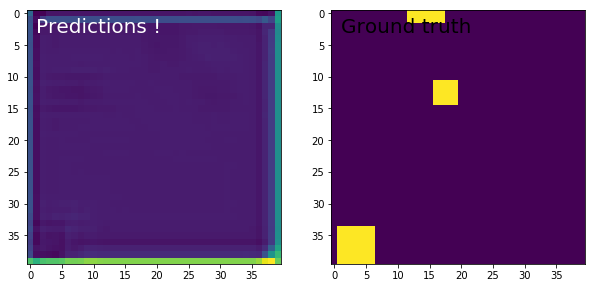

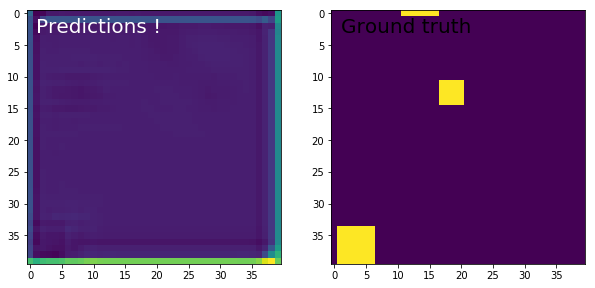

In [12]:
for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

#### SimpleRNN

In [14]:
from keras.layers import SimpleRNN
K.clear_session()

print('Build model...')
model1 = Sequential()
model1.add(Embedding(max_features, 128))
model1.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model1.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


In [15]:
print('Train...')
model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))# epochs=15
score1, acc1 = model1.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score1)
print('Test accuracy:', acc1)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 78s 3ms/step - loss: 0.6834 - accuracy: 0.5495 - val_loss: 0.6515 - val_accuracy: 0.6054
Epoch 2/5
25000/25000 [==============================] - 85s 3ms/step - loss: 0.5924 - accuracy: 0.6730 - val_loss: 0.5470 - val_accuracy: 0.7456
Epoch 3/5
25000/25000 [==============================] - 82s 3ms/step - loss: 0.4927 - accuracy: 0.7645 - val_loss: 0.6145 - val_accuracy: 0.6585
Epoch 4/5
25000/25000 [==============================] - 82s 3ms/step - loss: 0.4423 - accuracy: 0.7991 - val_loss: 0.5124 - val_accuracy: 0.7721
Epoch 5/5
25000/25000 [==============================] - 7s 270us/step
Test score: 0.5526850250196457
Test accuracy: 0.7504799962043762


#### GRU

In [16]:
from keras.layers import GRU
K.clear_session()

model2 = Sequential()
model2.add(Embedding(max_features, 128))
model2.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,658,817
Trainable params: 2,658,817
Non-trainable params: 0
_________________________________________________________________


In [17]:
print('Train...')
model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))# epochs=15
score2, acc2 = model2.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score2)
print('Test accuracy:', acc2)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 148s 6ms/step - loss: 0.9100 - accuracy: 0.6957 - val_loss: 0.5569 - val_accuracy: 0.7094
Epoch 2/5
25000/25000 [==============================] - 150s 6ms/step - loss: 0.8756 - accuracy: 0.7722 - val_loss: 0.5744 - val_accuracy: 0.6928
Epoch 3/5
25000/25000 [==============================] - 155s 6ms/step - loss: 0.7998 - accuracy: 0.8117 - val_loss: 0.5569 - val_accuracy: 0.7215
Epoch 4/5
25000/25000 [==============================] - 156s 6ms/step - loss: 0.5952 - accuracy: 0.8682 - val_loss: 0.5849 - val_accuracy: 0.7176
Epoch 5/5
25000/25000 [==============================] - 17s 680us/step
Test score: 0.6443692040729523
Test accuracy: 0.6801199913024902


### 【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。


[データセット - Keras Documentation](https://keras.io/ja/datasets/#_5)


Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

### 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。


- RNN
>リカレント（再帰型）ニューラルネットワーク  
>Recurrentレイヤーに対する基底クラス  
- SimpleRNNCell
>出力が入力にフィードバックされる全結合RNNのcellクラス  
- GRUCell
>ゲートのあるリカレントユニット - Cho et al. 2014.  
>GRUレイヤーのためのCellクラス．  
- LSTMCell
>長短期記憶ユニット - Hochreiter 1997.  
>LSTMレイヤーのためのcellクラス．  
- StackedRNNCells
>RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー．  
>効率的なstacked RNNを実装するために使われます．  
- CuDNNGRU
>CuDNNを利用した高速なGRU実装．  
>TensorFlowバックエンドでGPU上でのみ動作します．  
- CuDNNLSTM
>CuDNNを利用した高速なLSTM実装．  
>TensorFlowバックエンドでGPU上でのみ動作します．

[[TensorFlow/Keras] 好きな構造のRNNを組み立てるまでの道のり](https://qiita.com/everylittle/items/c088564d53cdfcde92cc)